#팀별 프로젝트를 통해, 수업에서 학습한 분류(Classification) 이론 및 실습 관련 실전 데이터 경험과 협업 경험을 쌓는다.

#- 목표: 
수업시간에 배운 두 가지 방법을 택하여 분류하고, 두 정확도 합을 최대한 올린다.
#- 방법:
· 데이터를 잘 정돈하고, 특성을 추출하고, 분류, 결과 제출/확인

· 수업시간에 배운 방법 중 두 가지를 택하여 분류 (예, 로지스틱 회귀와 랜덤포레스트)

· 인터넷의 코드를 참고 가능. 단 질문에 설명 못 하면 감점

· 강의자는 질의에 응답하지만, 많은 도움을 주지 않음, 팀원들과 문제 해결 바람

#데이터 불러오기

In [ ]:
#데이터 불러오기
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (3).csv
Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [ ]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('gender_submission.csv')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


PassengerId – 아이디

Survived – 생존=1, 죽음=0, target 값으로 사용

Pclass - 승객 등급. 1등급=1, 2등급=2, 3등급=3

Name – 이름

Sex - 성별

Age - 나이

SibSp - 함께 탑승한 형제 또는 배우자 수

Parch - 함께 탑승한 부모 또는 자녀 수

Ticket - 티켓 번호

Fare – 요금, 승객 등급에 따라 다름

Cabin - 선실 번호

Embarked - 탑승장소 S=Southhampton, C=Cherbourg, Q=Queenstown

# 전처리

In [ ]:
#데이터 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
#결측값 확인
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
#결측값 확인
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Age, Fare, Cabin의 결측값에 대한 전처리를 진행한다.

Name, Sex, Ticket, Cabin, Embarked의 object형식의 데이터에 대한 전처리를 진행한다.

In [ ]:
#성별은 male & female로 되어 있던 data를 category화 한다음 숫자로 바꿔주어 Sex_clean으로 새로운 열을 만들어 줌. (cat.codes- 카테고리 숫자로 바로 바꿔줌)
train['Sex_clean'] = train['Sex'].astype('category').cat.codes
test['Sex_clean'] = test['Sex'].astype('category').cat.codes

In [ ]:
#Embarked 값 확인
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# Embarked의 값이 S가 압도적인 비율이기때문에 na 값에 넣어야 하는 당위성이 보인다.
train['Embarked'].fillna('S', inplace=True)

#마찬가지로 카테고리형식으로 바꿔주고 cat.codes로 바꿔주어 바로 숫자로 나타내 주었다. 이를 Embarked_clean새로운 열로 만들어줌
train['Embarked_clean'] = train['Embarked'].astype('category').cat.codes
test['Embarked_clean'] = test['Embarked'].astype('category').cat.codes

더 정확한 정확도를 얻기위해 Family의 총 숫자를 계산하여 채워주는 새로운 컬럼, 혼자 탔는지를 확인해 주는 Solo 컬럼을 만듭니다.




In [ ]:
#‘SibSp’ 컬럼과 ‘Parch’ 컬럼을 합친다음에 자신을 더한 값이 자신이 속한 Family의 총 숫자가 됩니다.
train['Family'] = train['SibSp'] + train['Parch'] + 1 #1 더하는 이유 - 자기자신
test['Family'] = test['SibSp'] + test['Parch'] + 1 #1 더하는 이유 - 자기자신

In [ ]:
train['Family']

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: Family, Length: 891, dtype: int64

In [ ]:
#앞서 만든 Family 컬럼이 1일라면 혼자 탄 것으로 생각할 수 있습니다.
train['Solo'] = (train['Family'] == 1)
test['Solo'] = (test['Family'] == 1)

Fare요금 컬럼은 Numeric한 값보다는 단순화하기 위하여 Binning 기법을 활용하였습니다.

Binning 기법은 데이터를 그룹화를 하는것입니다.

In [ ]:
#pd.qcut을 활용하여 5구간으로 나누어 주어 binning하였습니다.
train['FareBin'] = pd.qcut(train['Fare'], 5)
test['FareBin'] = pd.qcut(test['Fare'], 5)

train['FareBin'].value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: FareBin, dtype: int64

In [ ]:
#Binning을 한 후에 Numeric한 값으로 변경하여 주었습니다.
train['Fare_clean'] = train['FareBin'].astype('category').cat.codes
test['Fare_clean'] = test['FareBin'].astype('category').cat.codes

train['Fare_clean'].value_counts()

1    184
3    180
0    179
4    176
2    172
Name: Fare_clean, dtype: int64

Title은 ‘Name’ 컬럼에서 ~씨와 같은 title을 추출하여 새롭게 생성해주는 컬럼입니다

In [ ]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
#수가 적은 title은 단일화 해주었습니다.
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

train['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

In [ ]:
#test 데이터도 똑같이 진행해주었습니다.
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

test['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: Title, dtype: int64

In [ ]:
#Title 역시 category화 해서 수치형으로 바꿔주었습니다.
train['Title_clean'] = train['Title'].astype('category').cat.codes
test['Title_clean'] = test['Title'].astype('category').cat.codes

Age의 결측값은 앞서 만들어준 Title로 Group화 한 Age의 Median 값으로 채워주었습니다.

In [ ]:
#groupby함수(Title로 그룹화함)와 transform함수(중앙값으로 바꿔줌) 사용하여 결측값을 채워주었다.
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

그런 다음, Age를 Binning 해주었는데, 5세 단위로 자르고 50대는 10세단위 그리고 60세이상은 모두 묶어서 Binning을 해주었습니다.

In [ ]:
# Train
train.loc[ train['Age'] <= 10, 'Age_clean'] = 0
train.loc[(train['Age'] > 10) & (train['Age'] <= 16), 'Age_clean'] = 1
train.loc[(train['Age'] > 16) & (train['Age'] <= 20), 'Age_clean'] = 2
train.loc[(train['Age'] > 20) & (train['Age'] <= 26), 'Age_clean'] = 3
train.loc[(train['Age'] > 26) & (train['Age'] <= 30), 'Age_clean'] = 4
train.loc[(train['Age'] > 30) & (train['Age'] <= 36), 'Age_clean'] = 5
train.loc[(train['Age'] > 36) & (train['Age'] <= 40), 'Age_clean'] = 6
train.loc[(train['Age'] > 40) & (train['Age'] <= 46), 'Age_clean'] = 7
train.loc[(train['Age'] > 46) & (train['Age'] <= 50), 'Age_clean'] = 8
train.loc[(train['Age'] > 50) & (train['Age'] <= 60), 'Age_clean'] = 9
train.loc[ train['Age'] > 60, 'Age_clean'] = 10

# Test
test.loc[ test['Age'] <= 10, 'Age_clean'] = 0
test.loc[(test['Age'] > 10) & (test['Age'] <= 16), 'Age_clean'] = 1
test.loc[(test['Age'] > 16) & (test['Age'] <= 20), 'Age_clean'] = 2
test.loc[(test['Age'] > 20) & (test['Age'] <= 26), 'Age_clean'] = 3
test.loc[(test['Age'] > 26) & (test['Age'] <= 30), 'Age_clean'] = 4
test.loc[(test['Age'] > 30) & (test['Age'] <= 36), 'Age_clean'] = 5
test.loc[(test['Age'] > 36) & (test['Age'] <= 40), 'Age_clean'] = 6
test.loc[(test['Age'] > 40) & (test['Age'] <= 46), 'Age_clean'] = 7
test.loc[(test['Age'] > 46) & (test['Age'] <= 50), 'Age_clean'] = 8
test.loc[(test['Age'] > 50) & (test['Age'] <= 60), 'Age_clean'] = 9
test.loc[ test['Age'] > 60, 'Age_clean'] = 10

Cabin은 결측값이 너무많아 삭제를 하려했지만 최대한 사용해보기로 했습니다.

Cabin 컬럼에서 숫자는 무시하고 앞에 붙는 문자를을 사용해주었습니다. 이 문자를 Numeric한 값으로 변경한 후에 Pclass로 Group한 median값을 일괄 적용해 주는 방식을 취해주었습니다.

In [ ]:
#앞에있는 문자만 확인
train['Cabin'].str[:1].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [ ]:
#각 문자를 숫자로 바꿔주기위한 정보를 만들어줌
mapping = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'T': 7
}

In [ ]:
train['Cabin_clean'] = train['Cabin'].str[:1]
# 숫자로 바꿔주기 위해 map함수를 사용함 - 여러개의 데이터를 한 번에 다른 형태로 변환하기에 좋음
train['Cabin_clean'] = train['Cabin_clean'].map(mapping)
# Pclass로 그룹화한 중앙값으로 바꿔줌
train['Cabin_clean'] = train.groupby('Pclass')['Cabin_clean'].transform('median')

#test데이터 또한 똑같이 바꿔줌
test['Cabin_clean'] = test['Cabin'].str[:1]
test['Cabin_clean'] = test['Cabin_clean'].map(mapping)
test['Cabin_clean'] = test.groupby('Pclass')['Cabin_clean'].transform('median')

In [ ]:
train['Cabin_clean'].value_counts()

5.0    491
2.0    216
4.5    184
Name: Cabin_clean, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Name            891 non-null    object  
 4   Sex             891 non-null    object  
 5   Age             891 non-null    float64 
 6   SibSp           891 non-null    int64   
 7   Parch           891 non-null    int64   
 8   Ticket          891 non-null    object  
 9   Fare            891 non-null    float64 
 10  Cabin           204 non-null    object  
 11  Embarked        891 non-null    object  
 12  Sex_clean       891 non-null    int8    
 13  Embarked_clean  891 non-null    int8    
 14  Family          891 non-null    int64   
 15  Solo            891 non-null    bool    
 16  FareBin         891 non-null    category
 17  Fare_clean      

#로지스틱회귀

In [ ]:
#사용할 특성과 타겟을 정해주었다.
feature = ['Pclass', 'SibSp', 'Parch', 'Sex_clean', 'Embarked_clean', 'Family', 'Solo', 'Title_clean', 'Age_clean', 'Cabin_clean', 'Fare_clean']
target = ['Survived']

In [ ]:
train2 = train[feature]
test2 = test[feature]
target2 = train[target]

In [ ]:
#로지스틱회귀에 앞서 표준화 작업 진행
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train2)
train_scaled = ss.transform(train2)
test_scaled = ss.transform(test2)

In [ ]:
#로지스틱 회귀 - (이진분류 생존/사망)
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train2, target2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
#교차검증을 통해 확인
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
#StratifiedKFold는 속성값 갯수를 동이랗게 가져감으로써 데이터가 한곳으로 몰리는 것을 방지
splitter = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_validate(lr, train_scaled, target2, return_train_score=True, cv=splitter)

print('트레인 세트: ',np.mean(scores['train_score']))
print('검증세트 : ',np.mean(scores['test_score']))

트레인 세트:  0.8044360748223205
검증세트 :  0.7878789780930261


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

In [ ]:
#각각의 변수별 중요도를 확인
print(lr.coef_, lr.intercept_)

[[-0.91006458 -0.31283129  0.01994204 -2.53915212 -0.17588928 -0.29298642
  -0.68951609 -0.25537667 -0.16362942  0.06509205  0.21750585]] [4.94893991]


In [ ]:
#테스트 세트 예측 데이터 만들고 submission에 넣어줌
pred = lr.predict(test_scaled)
pred = pd.DataFrame(pred)
submission['Survived'] = pred
submission

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


,PassengerId,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1
...,...,...
413,1305,1
414,1306,1
415,1307,1
416,1308,1


In [ ]:
submission.to_csv('lr_submission.csv', index = False)

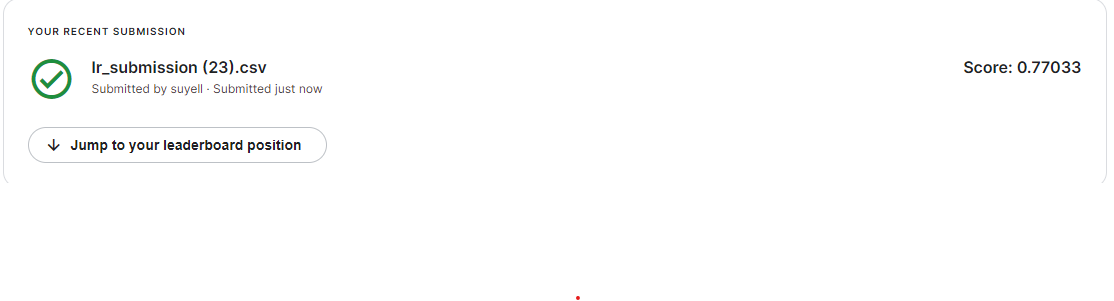

#랜덤포레스트

In [ ]:
#사용할 특성과 타겟을 정해주었다.
feature2 = ['Pclass', 'SibSp', 'Parch', 'Sex_clean', 'Embarked_clean', 'Family', 'Solo', 'Title_clean', 'Age_clean', 'Cabin_clean', 'Fare_clean']
target2 = ['Survived']

In [ ]:
train3 = train[feature2]
test3 = test[feature2]
target3 = train[target2]

In [ ]:
#랜덤포레스트 진행, cross_validate를 사용하여 교차검증
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

#랜덤포르세트로 데이터 학습시킴
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(train3, target3)
rf.score(train3, target3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


0.9102132435465768

In [ ]:
# 트레인 스코어가 너무 높다. max_depth를 확인하기위해 그리드 서치해주었다.
from sklearn.model_selection import GridSearchCV
params = {
          'max_depth': range(1, 10, 1),  #깊이
          'n_estimators' : range(30, 100, 10)  #트리의 개수
          }

In [ ]:
gs = GridSearchCV(RandomForestClassifier(), params, n_jobs=-1)
gs.fit(train3, target3)
print(gs.best_params_)

{'max_depth': 5, 'n_estimators': 60}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [ ]:
#여러번의 max_depth, n_estimators확인한 결과, 'max_depth': 4, n_estimators: 30 로 하여 다시 학습시켰다.
#
rf = RandomForestClassifier(n_estimators = 30, max_depth = 4, n_jobs=-1)
rf.fit(train3, target3)
rf.score(train3, target3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.8473625140291807

In [ ]:
# cross_validate를 사용하여 5-fold 교차검증
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

#StratifiedKFold는 속성값 갯수를 동이랗게 가져감으로써 데이터가 한곳으로 몰리는 것을 방지
splitter = StratifiedKFold(n_splits=5, shuffle=True)
scores = cross_validate(rf, train3, target3, return_train_score=True, cv=splitter)

print('트레인 세트: ',np.mean(scores['train_score']))
print('검증세트 : ',np.mean(scores['test_score']))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

트레인 세트:  0.8423136927368139
검증세트 :  0.8327976900382901


In [ ]:
# submission에 테스트 데이터에 대한 예측값 저장
pred2 = rf.predict(test3)
pred2 = pd.DataFrame(pred2)
submission['Survived'] = pred2
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv('rf_submission.csv',index=False)

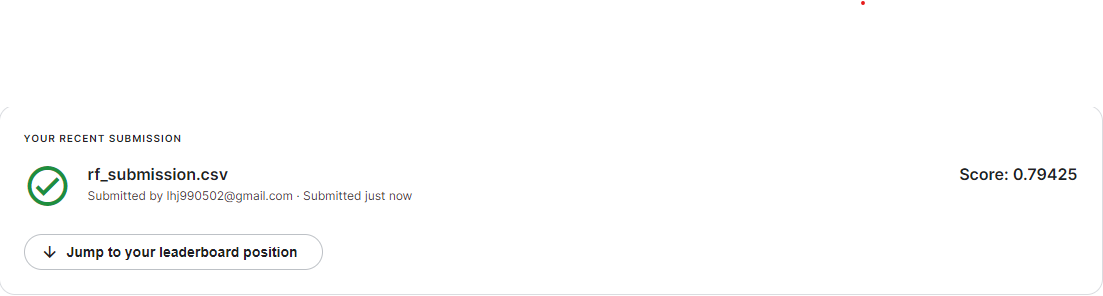